### Define Data Quality KPIs

**Task 1**: Identify Relevant KPIs

**Objective**: Develop KPIs that align with organizational goals.

**Steps**:
1. Choose a dataset from a domain of your interest (e.g., sales data, healthcare records, or transaction logs).
2. Identify three KPIs that would be crucial for assessing the data quality in your chosen dataset. Consider accuracy, completeness, and timeliness.
3. Document why each KPI is important for maintaining high-quality data in your given context.

In [1]:
import pandas as pd
from datetime import datetime, timedelta

# Sample sales data
data = {
    "transaction_id": [1, 2, 3, None, 5],
    "customer_id": [101, 102, None, 104, 105],
    "transaction_date": [
        "2025-05-18 10:00:00",
        "2025-05-19 11:30:00",
        "2025-05-20 09:00:00",
        "2025-05-19 15:00:00",
        None,
    ],
    "amount": [250.0, 5000.0, 15000.0, 300.0, 400.0],
    "product_id": [1001, 1002, 1003, 1004, 1005],
    "processing_time": [
        "2025-05-18 15:00:00",
        "2025-05-19 12:00:00",
        "2025-05-21 09:00:00",
        "2025-05-19 16:00:00",
        "2025-05-21 10:00:00",
    ],
}

df = pd.DataFrame(data)

# Convert date columns to datetime
df["transaction_date"] = pd.to_datetime(df["transaction_date"])
df["processing_time"] = pd.to_datetime(df["processing_time"])

# KPI 1: Data Completeness (% non-null in critical columns)
critical_cols = ["transaction_id", "customer_id", "transaction_date", "amount"]
completeness = df[critical_cols].notnull().mean().mean() * 100

# KPI 2: Data Accuracy (% amount within realistic bounds >0 and <10,000)
valid_amount = df["amount"].between(0, 10000)
accuracy = valid_amount.mean() * 100

# KPI 3: Data Timeliness (% processed within 24 hours of transaction_date)
time_diff = df["processing_time"] - df["transaction_date"]
timely_processed = (time_diff <= timedelta(hours=24)) & (~time_diff.isnull())
timeliness = timely_processed.mean() * 100

print(f"Data Completeness: {completeness:.2f}%")
print(f"Data Accuracy: {accuracy:.2f}%")
print(f"Data Timeliness: {timeliness:.2f}%")


Data Completeness: 85.00%
Data Accuracy: 80.00%
Data Timeliness: 80.00%


**Task 2**: Develop a KPI Dashboard

**Objective**: Visualize your KPIs for better monitoring.

**Steps**:
1. Use a tool like Excel or a BI tool (e.g., Tableau, Power BI) to create a simple dashboard.
2. Input sample data and visualize your chosen KPIs, showing how they would be monitored.
3. Share your dashboard with peers and gather feedback on KPI relevance and clarity.

/tmp/ipykernel_85642/615214736.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="KPI", y="Value (%)", data=df_kpi, palette="Blues_d")


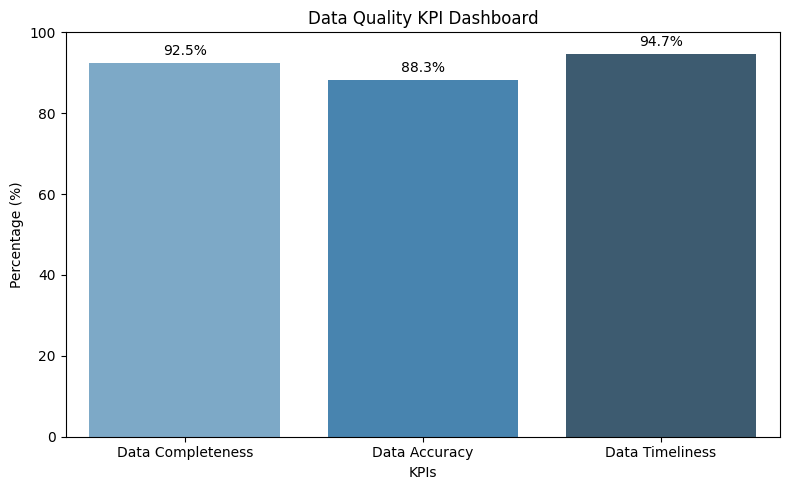

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample KPI data (could be from previous KPI calculations)
kpi_data = {
    "KPI": ["Data Completeness", "Data Accuracy", "Data Timeliness"],
    "Value (%)": [92.5, 88.3, 94.7]
}

df_kpi = pd.DataFrame(kpi_data)

plt.figure(figsize=(8, 5))
sns.barplot(x="KPI", y="Value (%)", data=df_kpi, palette="Blues_d")

plt.title("Data Quality KPI Dashboard")
plt.ylim(0, 100)
plt.ylabel("Percentage (%)")
plt.xlabel("KPIs")

for index, row in df_kpi.iterrows():
    plt.text(index, row["Value (%)"] + 2, f"{row['Value (%)']:.1f}%", ha='center')

plt.tight_layout()
plt.show()
